<a href="https://colab.research.google.com/github/rtajeong/M4_new/blob/main/lab_06_keras_mlp_cnn_rnn_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP, CNN, and RNNs

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, SimpleRNN, LSTM, GRU

## Dense layer
- fully connected layer
- Now the model will take as input arrays of shape (None, 16)  and output arrays of shape (None, 32).  
- Note that after the first layer, you don't need to specify the size of the input anymore:

In [ ]:
# Dense layer
model = Sequential()

# model.add(Input(shape=(16,)))
# model.add(layers.Dense(32, activation='relu'))
model.add(Dense(32, input_shape=(16,), activation='relu'))
model.add(Dense(32))
model.summary()
model.output_shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


(None, 32)

In [ ]:
input = keras.Input(shape=(16, ))
x = layers.Dense(32, activation="relu")(input)
output = layers.Dense(32)(x)
model = keras.Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


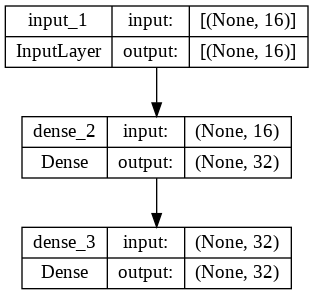

In [ ]:
keras.utils.plot_model(model, "model1.png", show_shapes=True)

## CNN layer
- When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis)

In [ ]:
model = tf.keras.models.Sequential()

model.add(Conv2D(2, (3,3), input_shape=(28,28,3), activation='relu'))
model.summary()
model.output_shape

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 2)         56        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


(None, 26, 26, 2)

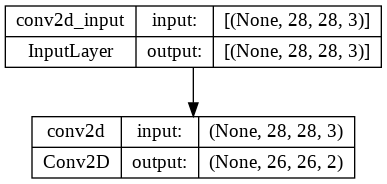

In [ ]:
keras.utils.plot_model(model, "model2.png", show_shapes=True)

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = Conv2D(2, (3,3), activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)


(4, 26, 26, 2)


In [ ]:
# With `dilation_rate` as 2. (3x3 필터 외곽 모형이 5x5 가 됨)
# it can deliver a wider field of view. -> popular in real-time segmentation.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = Conv2D(2, 3, activation='relu',
           dilation_rate=2, input_shape=input_shape[1:])(x)
print(y.shape)

(4, 24, 24, 2)


In [ ]:
# With `padding` as "same" (same) or "valid" (no padding)
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu',
                           padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 28, 28, 2)


## RNN layers
- SImpleRNN(units, return_sequences, return_state):
  - Fully-connected RNN where the output is to be fed back to input.
  - units: Positive integer, dimensionality of the output space
  - return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
  - return_state: Boolean. Whether to return the last state in addition to the output. Default: False
- inputs: A 3D tensor, with shape **[batch, timesteps, feature]** (RNN 셀에 입력되는 텐서의 모양은 (batch_size, timesteps, input_dim)
- output shape: (batch_size, units) or (batch_size, timesteps, units), if return_sequences=True.
- A RNN layer can return the entire sequence of outputs for each sample (one vector per timestep per sample), if return_sequences=True.
- LSTM
- GRU


- 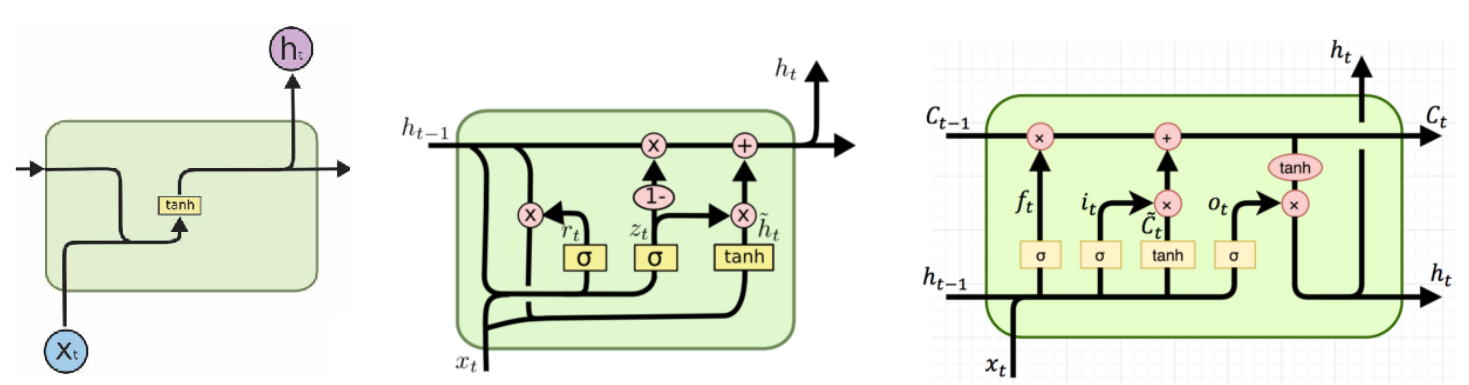

In [ ]:
# example 1

In [ ]:
# RNN 입력 데이터 예시
x = np.array([[[1, 2, 3],     # => timestep 1
               [4, 5, 6]],    # => timestep 2, # => batch 1

              [[7, 8, 9],
               [10, 11, 12]], # => batch 2

              [[13, 14, 15],
               [16, 17, 18]]  # => batch 3
             ])

print('(Batch size, timesteps, input_dim) = ',x.shape)

(Batch size, timesteps, input_dim) =  (3, 2, 3)


In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50)(x)   # returns one
print(rnn.shape)
model = keras.Model(x, rnn)
model.summary()

(None, 50)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 30)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________


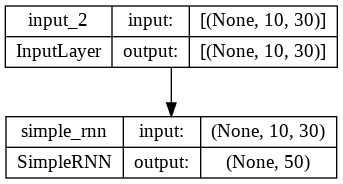

In [ ]:
keras.utils.plot_model(model, "model3.png", show_shapes=True)

In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50, return_sequences = True)(x)
print(rnn.shape)                # returns one
model = keras.Model(x, rnn)
model.summary()

(None, 10, 50)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 30)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10, 50)            4050      
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50, return_sequences = True, return_state = True)(x)
print(len(rnn))                 # returns two (whole sequence output, final state)
print(rnn[0].shape, rnn[1].shape)
model = keras.Model(x, rnn)
model.summary()

2
(None, 10, 50) (None, 50)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 30)]          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    [(None, 10, 50),          4050      
                              (None, 50)]                        
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________


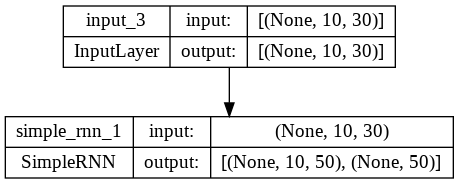

In [ ]:
keras.utils.plot_model(model, "model4.png", show_shapes=True)

In [ ]:
# when batch_size is given ( the same)
x = np.random.random([32, 10, 8]).astype('float32')
rnn = layers.SimpleRNN(4)(x)
print(rnn.shape)  # The output has shape `[32, 4]`

x = np.random.random([32, 10, 8]).astype('float32')
rnn = layers.SimpleRNN(4, return_sequences=True, return_state=True)(x)
whole_sequence_output, final_state = rnn[0], rnn[1]
print(whole_sequence_output.shape, final_state.shape)

(32, 4)
(32, 10, 4) (32, 4)


In [ ]:
model = keras.Sequential()
model.add(layers.SimpleRNN(50, input_shape=(10,30)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 50)                4050      
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(layers.SimpleRNN(50, input_shape=(10,30), return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 10, 50)            4050      
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# sequential model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, input_shape=(10,30), return_sequences=True))
model.summary()

# functional API model
x = Input(shape=(10,30))
y = layers.SimpleRNN(50, return_sequences=True)(x)
model = Model(x,y)
model.summary()

x = Input(shape=(10,30))
y = layers.SimpleRNN(50, return_sequences=True, return_state=True)(x)
model = Model(x,y)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 10, 50)            4050      
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 30)]          0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 10, 50)            4050      
                                                                 
Total params: 4,050
Trainable params: 4,050
Non-trainable params: 0
_________________________________________________________________
Model: "model_5"
________________

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(10,30), return_sequences=True))
model.summary()

# functional API model
x = Input(shape=(10,30))
y = layers.LSTM(50, return_sequences=True)(x)
model = Model(x,y)
model.summary()

# return_state=True gives multiple output -> functional API needed
x = Input(shape=(10,30))
y = layers.LSTM(50, return_sequences=True, return_state=True)(x)
model = Model(x,y)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            16200     
                                                                 
Total params: 16,200
Trainable params: 16,200
Non-trainable params: 0
_________________________________________________________________
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10, 30)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            16200     
                                                                 
Total params: 16,200
Trainable params: 16,200
Non-trainable params: 0
_________________________________________________________________
Model: "model_6"
____________

In [ ]:
model = keras.Sequential()
model.add(layers.GRU(50, input_shape=(10,30), return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 50)            12300     
                                                                 
Total params: 12,300
Trainable params: 12,300
Non-trainable params: 0
_________________________________________________________________


## RNN with Embedding layer

In [ ]:
# example 2
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(128))   # 128 internal units
model.add(layers.Dense(10))   # 10 units
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 128)               24704     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 89,994
Trainable params: 89,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1000 * 64 = 64000
# (64 + 128) *128 + 128 = 24704

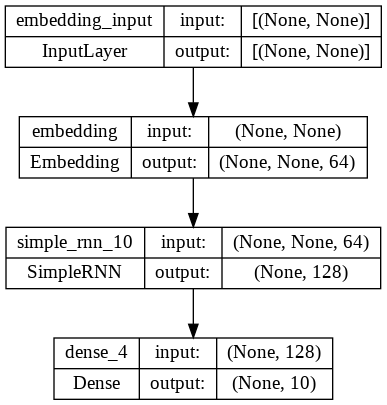

In [ ]:
keras.utils.plot_model(model, "model5.png", show_shapes=True)

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))   # 128 internal units
model.add(layers.Dense(10))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# (64 + 128) *128 + 128 = 24704
# 24704 * 4 = 98816

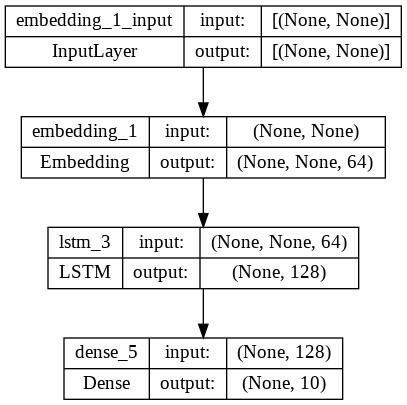

In [ ]:
keras.utils.plot_model(model, "model7.png", show_shapes=True)

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128, return_sequences=True))   # 128 internal units
model.add(layers.Dense(10))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_4 (LSTM)               (None, None, 128)         98816     
                                                                 
 dense_6 (Dense)             (None, None, 10)          1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM and Embedding layer with input_length
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64, input_length=20))
model.add(layers.LSTM(128, return_sequences=True)) # infer time_step from Embedding()
model.add(layers.Flatten())
model.add(layers.Dense(10))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 64)            64000     
                                                                 
 lstm_5 (LSTM)               (None, 20, 128)           98816     
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                25610     
                                                                 
Total params: 188,426
Trainable params: 188,426
Non-trainable params: 0
_________________________________________________________________


- By default, the output of a RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence.
- The shape of this output is (batch_size, units) where units corresponds to the units argument passed to the layer's constructor.
- A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set return_sequences=True. The shape of this output is (batch_size, timesteps, units).
- In addition, a RNN layer can return its final internal state(s) by giving return_state=True. The returned states can be used to resume the RNN execution later, or to initialize another RNN. This setting is commonly used in the encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.GRU(128, return_sequences=True))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru_1 (GRU)                 (None, None, 128)         74496     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 172,682
Trainable params: 172,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# GRU: 24704 * 3  이 아님 (weight 에 bias 주는 방법이 약간 다름)

## Functional API
- in case you have return_state=True (multi-output 이므로 functional API model 사용해야 함)

In [ ]:
# RNN
inputs = tf.random.normal([2, 5, 3])   # (batch, timestep, feature)

rnn = tf.keras.layers.SimpleRNN(4)
output1 = rnn(inputs)
print(output1.shape)

rnn = tf.keras.layers.SimpleRNN(4, return_sequences=True)
output2 = rnn(inputs)
print(output2.shape)

rnn = tf.keras.layers.SimpleRNN(4, return_state=True)
output3, state3 = rnn(inputs)

print(output3)
print(state3)
output3 == state3       # the same

(2, 4)
(2, 5, 4)
tf.Tensor(
[[ 0.8945642   0.7403299   0.00709832  0.24416015]
 [ 0.5822657   0.44796973 -0.57063675 -0.82318825]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[ 0.8945642   0.7403299   0.00709832  0.24416015]
 [ 0.5822657   0.44796973 -0.57063675 -0.82318825]], shape=(2, 4), dtype=float32)


<tf.Tensor: shape=(2, 4), dtype=bool, numpy=
array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])>

In [ ]:
rnn = tf.keras.layers.SimpleRNN(4, return_state=True, return_sequences=True)
output4, state4 = rnn(inputs)
np.array(output4).shape, np.array(state4).shape

((2, 5, 4), (2, 4))

In [ ]:
# LSTM
inputs = tf.random.normal([2, 5, 3])   # (batch, timestep, feature)

lstm = tf.keras.layers.LSTM(4)
output1 = lstm(inputs)
print(output1.shape)

lstm = tf.keras.layers.LSTM(4, return_sequences=True)
output2 = lstm(inputs)
print(output2.shape)

lstm = tf.keras.layers.LSTM(4, return_state=True)
output3 = lstm(inputs)
print(len(output3))
[output3[i].numpy().round(2) for i in range(len(output3))]

(2, 4)
(2, 5, 4)
3


[array([[-0.09, -0.1 ,  0.11, -0.22],
        [-0.01,  0.02,  0.03, -0.14]], dtype=float32),
 array([[-0.09, -0.1 ,  0.11, -0.22],
        [-0.01,  0.02,  0.03, -0.14]], dtype=float32),
 array([[-0.17, -0.19,  0.32, -0.47],
        [-0.01,  0.04,  0.09, -0.35]], dtype=float32)]

In [ ]:
# GRU
inputs = tf.random.normal([2, 5, 3])   # (batch, timestep, feature)

gru = tf.keras.layers.GRU(4)
output1 = gru(inputs)
print(output1.shape)

gru = tf.keras.layers.GRU(4, return_sequences=True)
output2 = gru(inputs)
print(output2.shape)

gru = tf.keras.layers.GRU(4, return_state=True)
output3 = gru(inputs)
print(len(output3))
[output3[i].numpy().round(2) for i in range(len(output3))]

(2, 4)
(2, 5, 4)
2


[array([[ 0.22,  0.18, -0.17, -0.46],
        [-0.  , -0.01,  0.1 , -0.06]], dtype=float32),
 array([[ 0.22,  0.18, -0.17, -0.46],
        [-0.  , -0.01,  0.1 , -0.06]], dtype=float32)]

## Embedding Layer
- can only be used as the first layer in a model
- Turns positive integers (indexes) into dense vectors of fixed size:
  - (ex) [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

- Embedding(input_dim, output_dim, input_length):
  - input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
  - output_dim: Integer. Dimension of the dense embedding.
  - input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
- input_shape: (batch, input_length)
- output_shape: (batch, input_length. output_dim)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input
# should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch dimension.
x = np.random.randint(1000, size=(32, 10))
output = model.predict(x)
model.summary()
print(output.shape)

1/1 [==============================] - 0s 153ms/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 64)            64000     
                                                                 
Total params: 64,000
Trainable params: 64,000
Non-trainable params: 0
_________________________________________________________________
(32, 10, 64)


## Bidirectional RNNs
- For sequences other than time series (e.g. text), it is often the case that a RNN model can perform better if it not only processes sequence from start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only just the words that come before it.
- (ex) what word might be appropriate?
   - I am ___.
   - I am ___ hungry.
   - I am ___ hungry, and I can eat half a pig.
- Depending on the amount of information available, we might fill in the blanks with very different words such as “happy”, “not”, and “very”. Clearly the end of the phrase (if available) conveys significant information about which word to pick.
- need entire sentences to predict

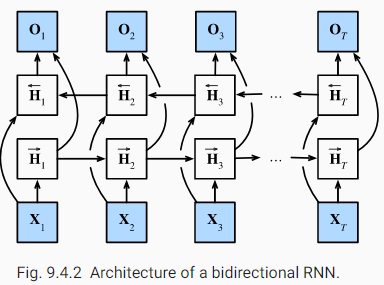

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = tf.keras.Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 10)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 5, 128)           38400     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ((10+64)*64 + 64) * 4 * 2   # bidirectional = two times of the single-directional

38400

- Under the hood, Bidirectional will copy the RNN layer passed in, and flip the go_backwards field of the newly copied layer, so that it will process the inputs in reverse order.
- **The output of the Bidirectional RNN will be, by default, the sum of the forward layer output and the backward layer output**. If you need a different merging behavior, e.g. concatenation, change the merge_mode parameter in the Bidirectional wrapper constructor. For more details about Bidirectional, please check the API docs.

## (Exercise) LSTM on IMDB
- Bidirectional LSTM and single-direction LSTM

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [ ]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17464789/17464789 [==============================] - 3s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
# bi-directional LSTM
inputs = keras.Input(shape=(maxlen,), dtype="int32")
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(50, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(50))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 100)         71600     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,692,101
Trainable params: 2,692,101
Non-tra

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
782/782 [==============================] - 49s 50ms/step - loss: 0.3891 - accuracy: 0.8267 - val_loss: 0.3089 - val_accuracy: 0.8699
Epoch 2/2
781/782 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9159

In [ ]:
# single-directional LSTM model
model2 = Sequential()
model2.add(layers.Embedding(max_features, 128, input_length=maxlen))
model2.add(layers.LSTM(50, return_sequences=True))
model2.add(layers.LSTM(50))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.summary()

model2.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm_13 (LSTM)              (None, 200, 50)           35800     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,616,051
Trainable params: 2,616,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
782/782 [==============================] - 24s 27ms/step - loss: 0.4096 - accuracy: 0.8144 - val_loss: 0.3393 - val_accuracy: 0.8639
Epoch 2/2
782/782 [=============

# Exercise